In [ ]:
import pyarrow.parquet as pq
import pandas as pd


parquet_file = pq.ParquetFile('test.parquet')


# Obtenez le nombre de groupes de lignes dans le fichier
num_row_groups = parquet_file.num_row_groups

# Créez une liste pour stocker les DataFrames
dfs = []

# Lisez chaque groupe de lignes et stockez dans la liste
"""num_row_groups"""
""",columns=features"""

for i in range(num_row_groups):
    row_group = parquet_file.read_row_group(i)
    df_intermediaire = row_group.to_pandas()
    dfs.append(df_intermediaire)

# Concaténez tous les DataFrames en un seul
df = pd.concat(dfs, ignore_index=True)


In [ ]:
df.describe()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PRS_PDS_QCP,EXE_INS_REG,PSE_ACT_SNDS,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,202406.0,53.060550,46.399480,52.007000,4.506970,1.191900,1.548080,50.884700,8194.127820,88.442240,...,25.197240,59.208900,27.521890,3.584380,2.523740,2.088510,75.328990,1.175460,5.933890,5.962150
std,0.0,31.597094,24.825117,29.868692,4.411028,0.577493,0.497726,59.514556,3524.089861,24.552002,...,11.054461,32.075122,21.817701,11.086811,6.966125,2.530541,31.630817,5.217318,22.132851,9.972786
min,202406.0,5.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1101.000000,5.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,202406.0,27.000000,30.000000,27.000000,0.000000,1.000000,1.000000,0.000000,9999.000000,99.000000,...,31.000000,28.000000,0.000000,1.000000,0.000000,1.000000,52.000000,0.000000,0.000000,1.000000
50%,202406.0,52.000000,50.000000,52.000000,1.000000,1.000000,2.000000,0.000000,9999.000000,99.000000,...,31.000000,53.000000,26.000000,2.000000,0.000000,1.000000,99.000000,0.000000,1.000000,1.000000
75%,202406.0,84.000000,70.000000,76.000000,9.000000,1.000000,2.000000,121.000000,9999.000000,99.000000,...,31.000000,93.000000,50.000000,3.000000,1.000000,2.000000,99.000000,0.000000,1.000000,7.000000
max,202406.0,99.000000,99.000000,99.000000,9.000000,4.000000,2.000000,121.000000,9999.000000,99.000000,...,34.000000,99.000000,99.000000,99.000000,80.000000,9.000000,99.000000,60.000000,99.000000,99.000000


In [ ]:
df = df.rename(columns={
    'FLX_ANN_MOI': 'date_traitement_annee_mois',
    'SOI_ANN': 'annee_soins',
    'SOI_MOI': 'mois_soins',
    'AGE_BEN_SNDS': 'age_tranche_beneficiaire',
    'BEN_SEX_COD': 'sexe_beneficiaire',
    'BEN_CMU_TOP': 'top_cmu_c',
    'BEN_QLT_COD': 'qualite_beneficiaire',
    'BEN_RES_REG': 'region_residence_beneficiaire',
    'ASU_NAT': 'nature_assurance',
    'EXO_MTF': 'motif_exoneration_tm',
    'MTM_NAT': 'modulation_ticket_moderateur',
    'ATT_NAT': 'nature_at',
    'ETE_CAT_SNDS': 'categorie_etab_executant',
    'ETE_TYP_SNDS': 'type_etab_executant',
    'ETE_REG_COD': 'region_implantation_etab_executant',
    'ETE_IND_TAA': 'indicateur_taa_executant',
    'MDT_TYP_COD': 'mode_traitement_etab',
    'MFT_COD': 'mode_fixation_tarif_etab',
    'ETP_CAT_SNDS': 'categorie_etab_prescripteur',
    'ETP_REG_COD': 'region_implantation_etab_prescripteur',
    'ORG_CLE_REG': 'region_organisme_liquidateur',
    'EXE_INS_REG': 'region_ps_executant',
    'PSE_ACT_SNDS': 'activite_ps_executant',
    'PSE_ACT_CAT': 'categorie_ps_executant',
    'PSE_SPE_SNDS': 'specialite_ps_executant',
    'PSE_STJ_SNDS': 'statut_juridique_ps_executant',
    'PRE_INS_REG': 'region_ps_prescripteur',
    'PSP_ACT_SNDS': 'activite_ps_prescripteur',
    'PSP_ACT_CAT': 'categorie_ps_prescripteur',
    'PSP_SPE_SNDS': 'specialite_ps_prescripteur',
    'FLT_ACT_COG': 'coef_prestation_prefiltre',
    'FLT_ACT_NBR': 'denombrement_prefiltre',
    'FLT_ACT_QTE': 'quantite_prefiltre',
    'FLT_PAI_MNT': 'depense_prefiltre',
    'FLT_DEP_MNT': 'depassement_prefiltre',
    'FLT_REM_MNT': 'remboursement_prefiltre',
    'PRS_FJH_TYP': 'type_fjh',
    'PRS_ACT_COG': 'coef_prestation',
    'PRS_ACT_NBR': 'denombrement',
    'PRS_ACT_QTE': 'quantite',
    'PRS_DEP_MNT': 'depassement',
    'PRS_PAI_MNT': 'depense',
    'PRS_REM_BSE': 'base_remboursement',
        'PRS_REM_MNT': 'montant_remboursement',
    'PRS_REM_TAU': 'taux_remboursement',
    'PRS_REM_TYP': 'type_remboursement',
    'PRS_NAT': 'nature_prestation',
    'PRS_PPU_SEC': 'secteur_ps',
    'PRS_PDS_QCP': 'parcours_soins',
    'DDP_SPE_COD': 'discipline_prestation',
    'DRG_AFF_NAT': 'nature_destinataire_reglement',
    'CPL_COD': 'complement_acte',
    'CPT_ENV_TYP': 'type_enveloppe'
})


In [ ]:
print(df.isnull().sum())
"""ne pas prendre act PRS_ACT_NBR	et FLT_ACT_NBR"""

date_traitement_annee_mois                    0
region_organisme_liquidateur                  0
age_tranche_beneficiaire                      0
region_residence_beneficiaire                 0
top_cmu_c                                     0
qualite_beneficiaire                          0
sexe_beneficiaire                             0
discipline_prestation                         0
categorie_etab_executant                      0
region_implantation_etab_executant            0
type_etab_executant                           0
region_implantation_etab_prescripteur         0
categorie_etab_prescripteur                   0
mode_traitement_etab                          0
mode_fixation_tarif_etab                      0
type_fjh                                      0
coef_prestation                               0
denombrement                              10428
quantite                                      0
depassement                                   0
depense                                 

'ne pas prendre act PRS_ACT_NBR\tet FLT_ACT_NBR'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres de style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Boucle sur les colonnes
for column in df.columns:
    print(f"Distribution for column: {column}")
    print(df[column].value_counts())
    print("-" * 30)

    plt.figure()

Distribution for column: date_traitement_annee_mois
date_traitement_annee_mois
202406    100000
Name: count, dtype: int64
------------------------------
Distribution for column: region_organisme_liquidateur
region_organisme_liquidateur
11    14958
99    11174
44     8252
84     8101
76     7905
93     7725
32     7285
75     7177
52     5155
28     5090
27     4683
24     4605
53     4461
5      3429
Name: count, dtype: int64
------------------------------
Distribution for column: age_tranche_beneficiaire
age_tranche_beneficiaire
70    15503
60    15414
50    12953
80    12621
0     11689
40    11074
30    10663
20     9981
99      102
Name: count, dtype: int64
------------------------------
Distribution for column: region_residence_beneficiaire
region_residence_beneficiaire
11    12496
44     8920
84     8871
76     8836
93     8564
75     8115
32     8051
99     5972
52     5669
28     5539
27     5162
24     5128
53     5092
5      3585
Name: count, dtype: int64
--------------------

<ipython-input-24-f0279e972f4c>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

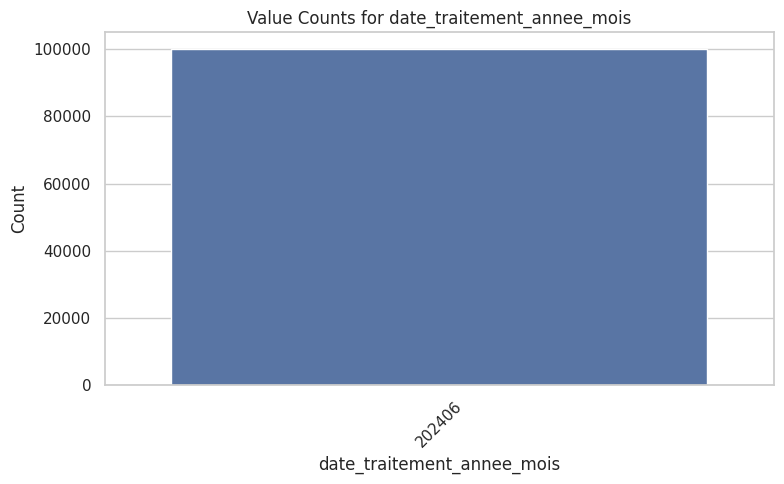

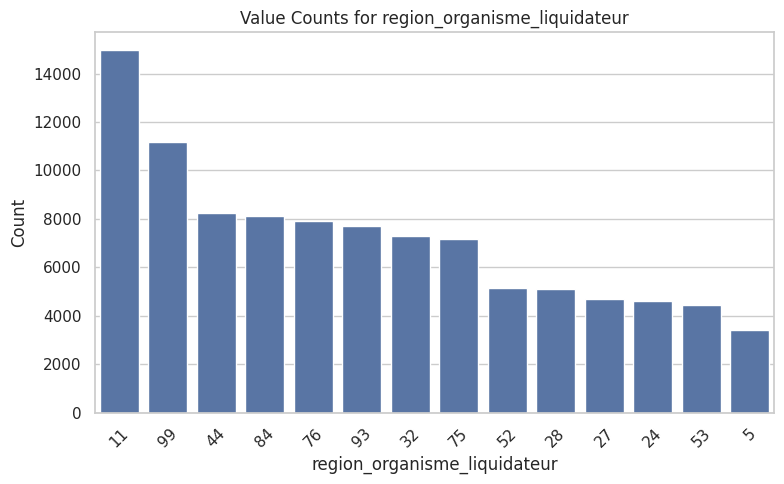

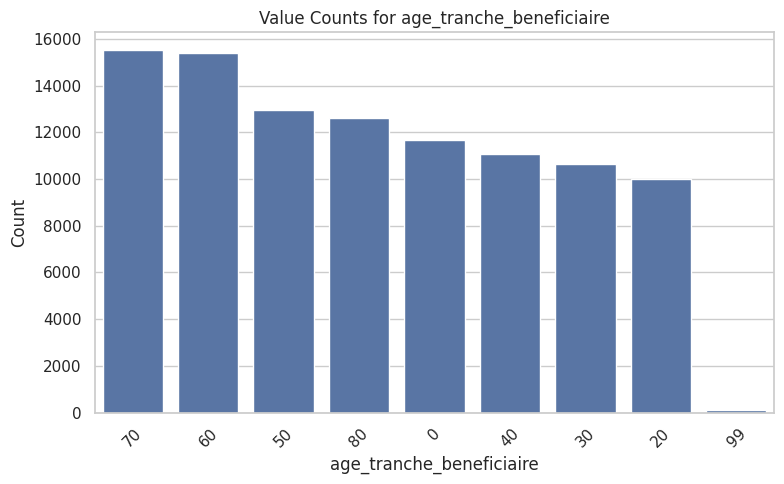

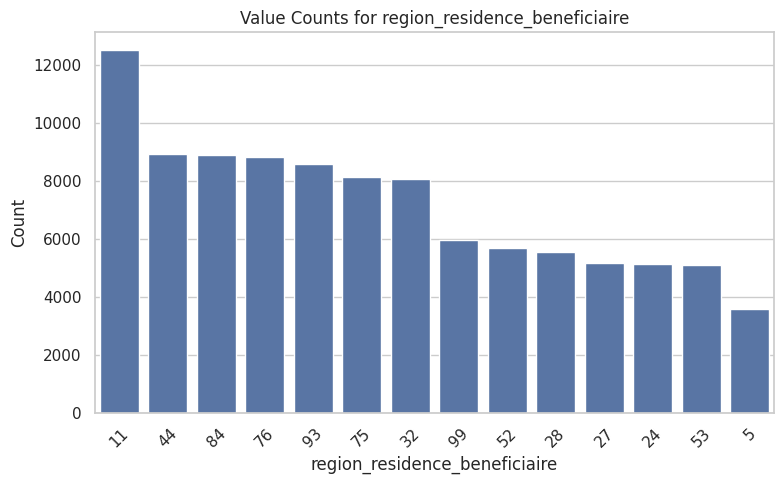

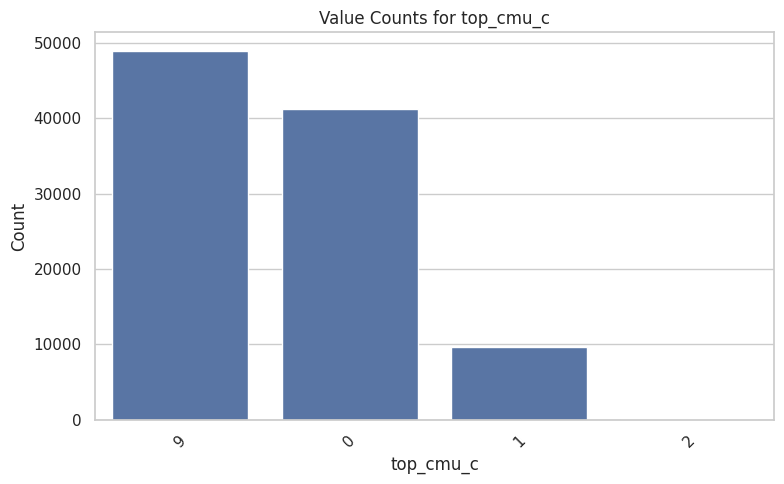

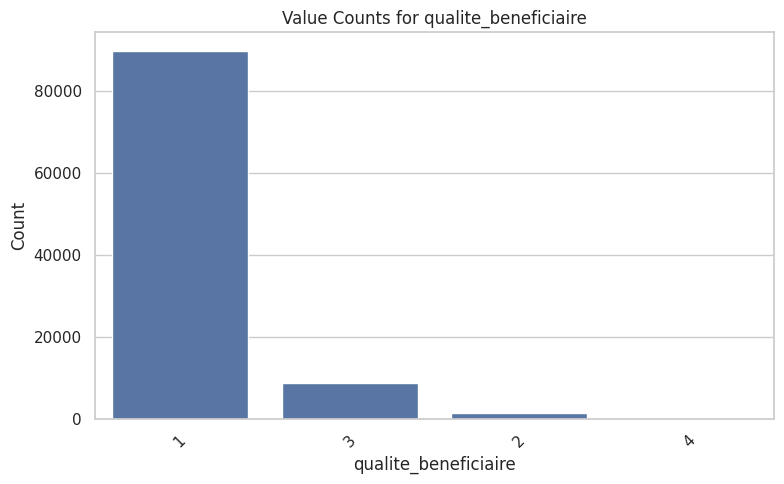

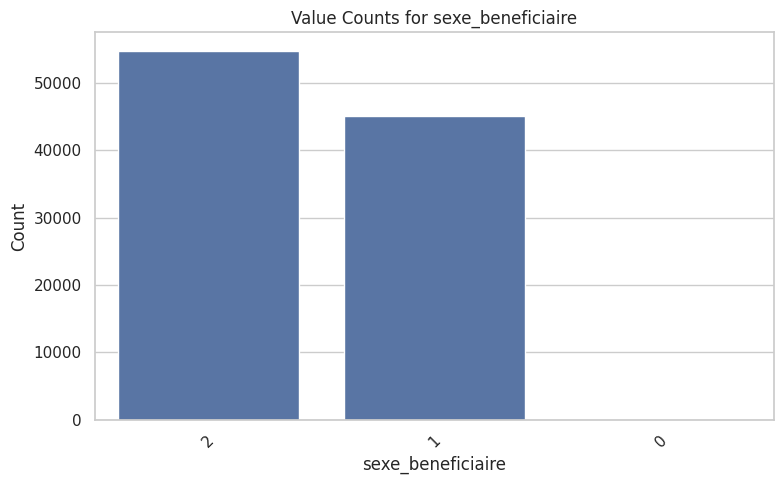

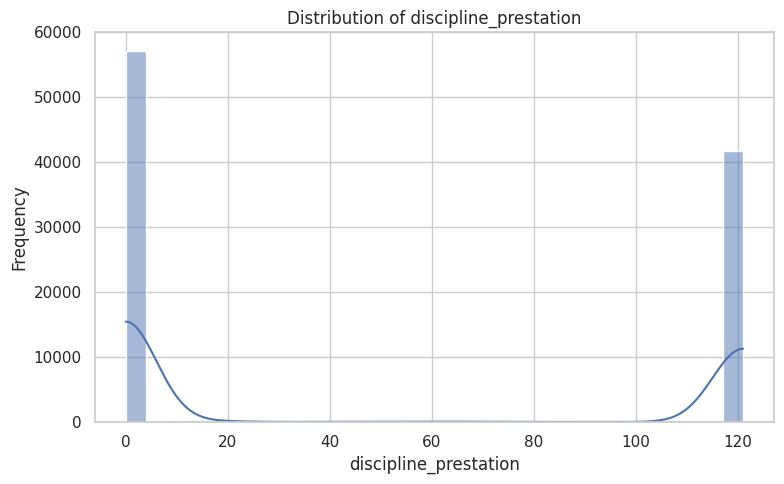

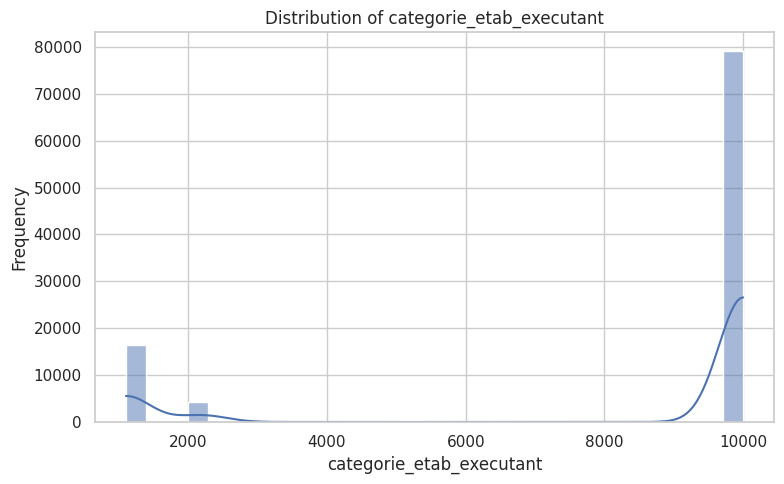

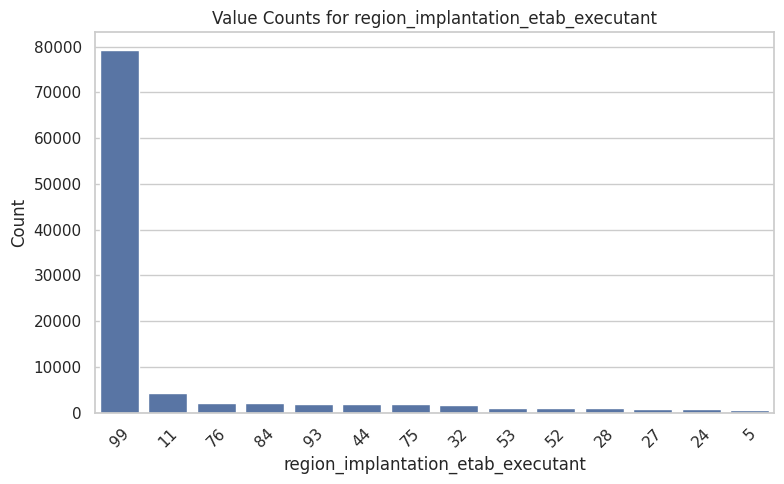

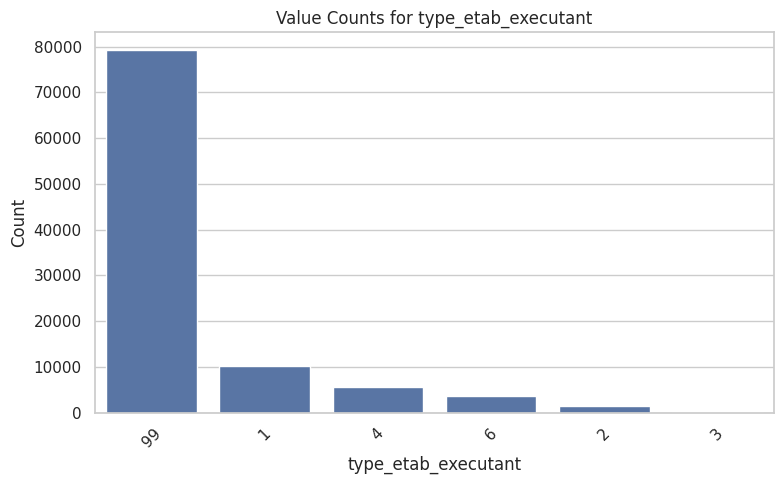

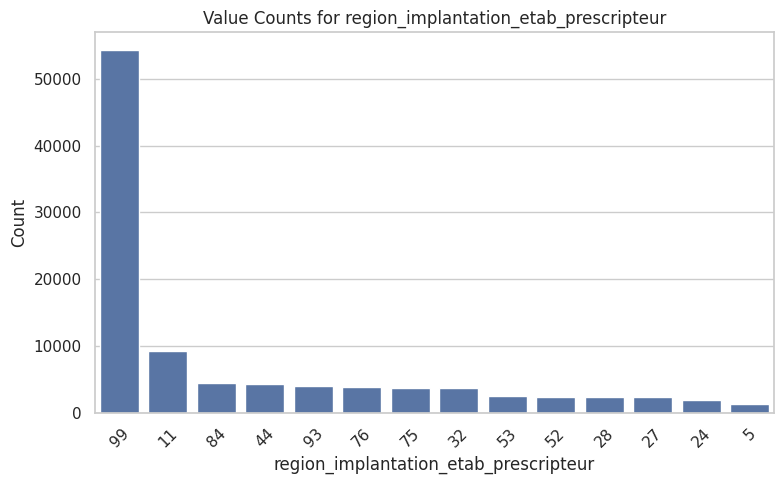

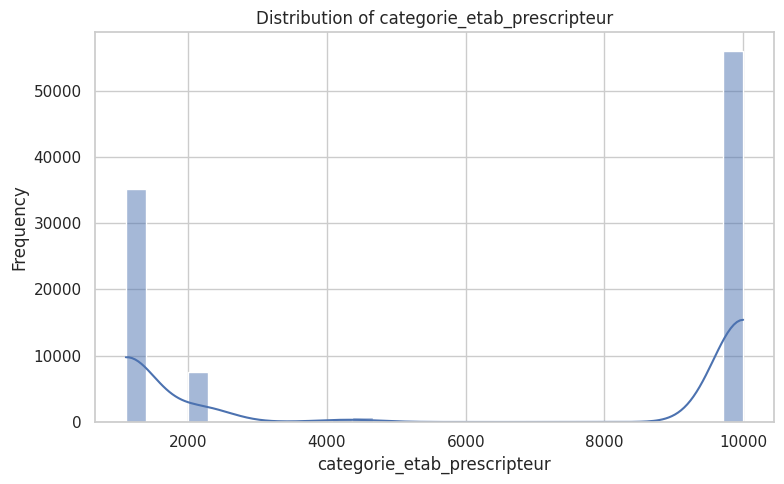

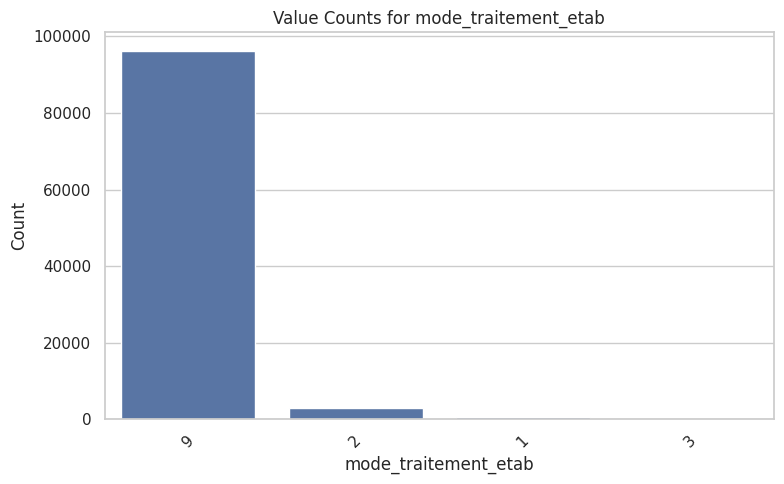

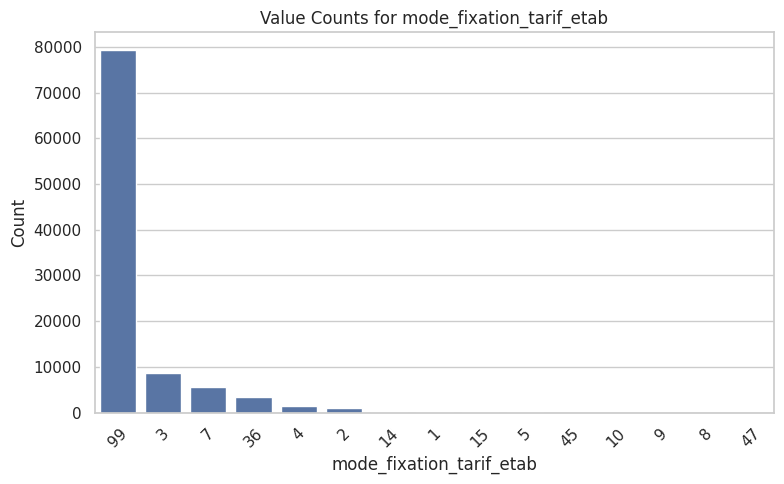

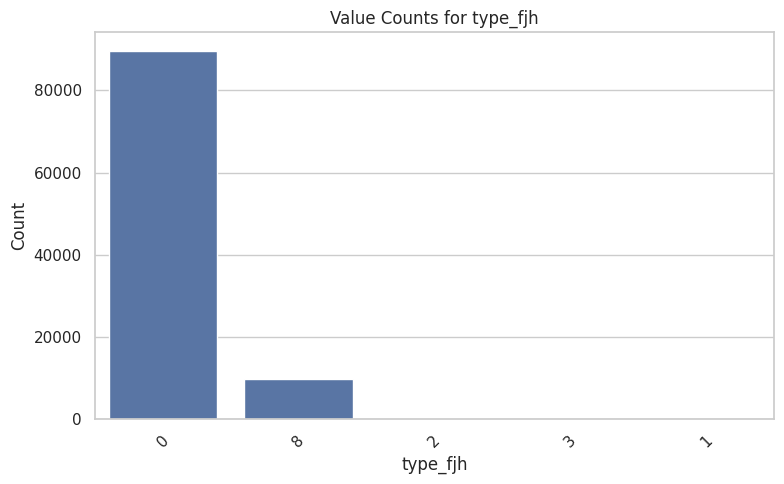

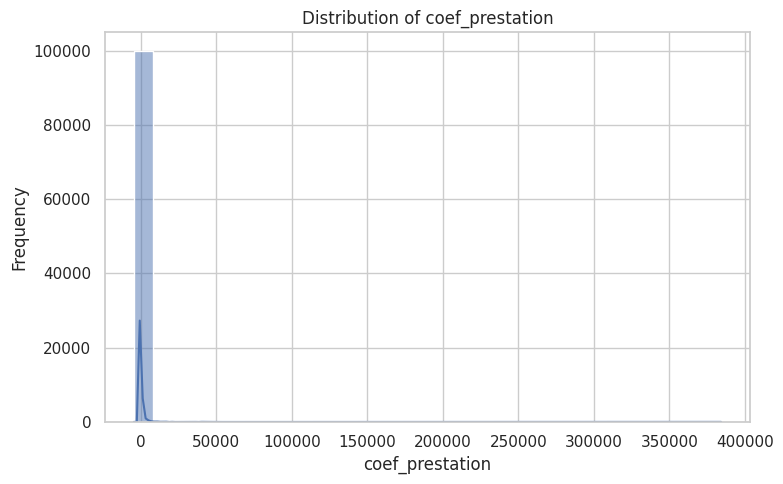

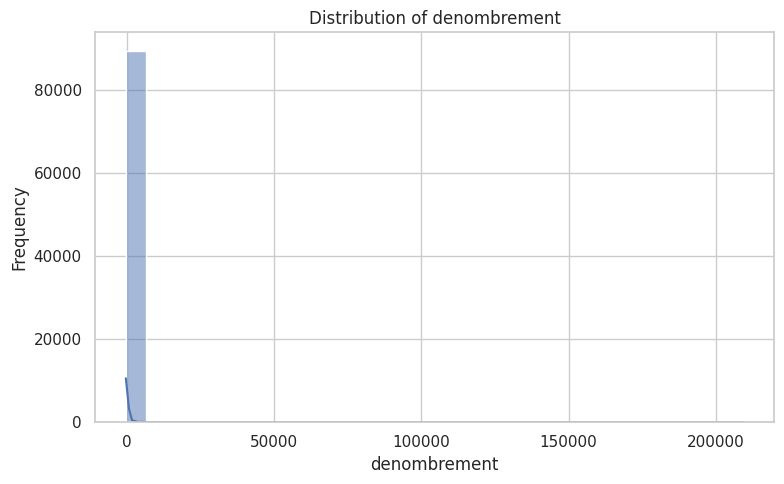

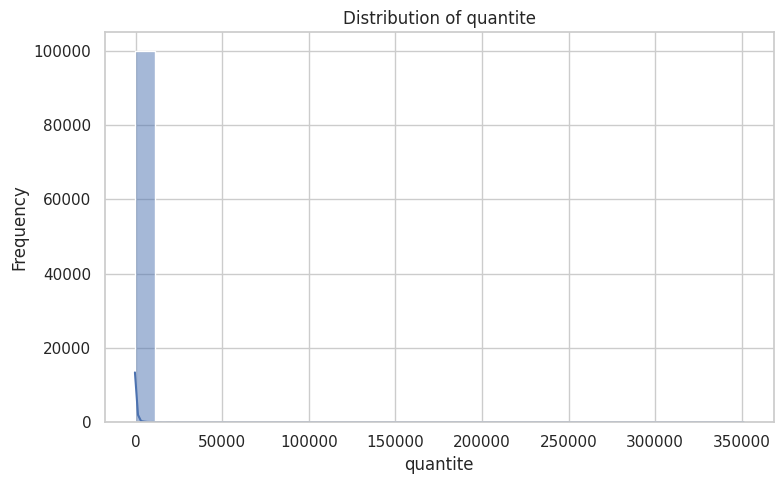

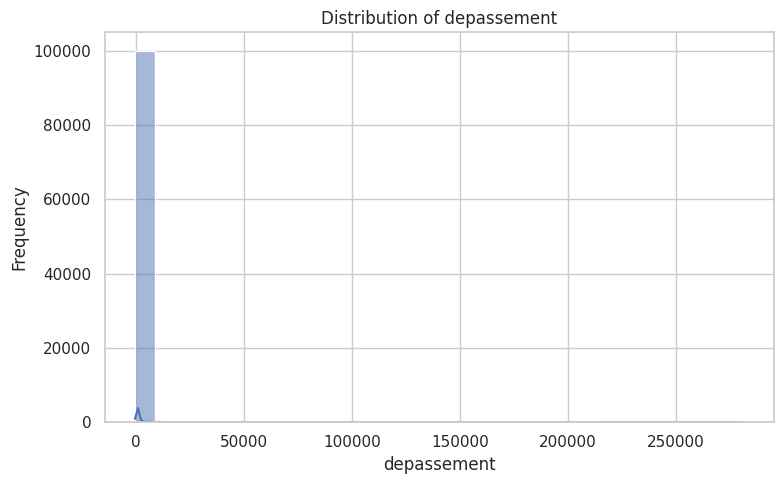

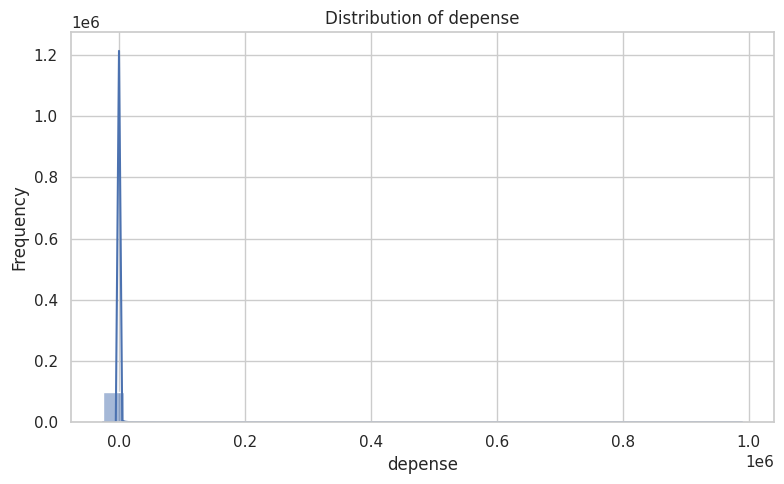

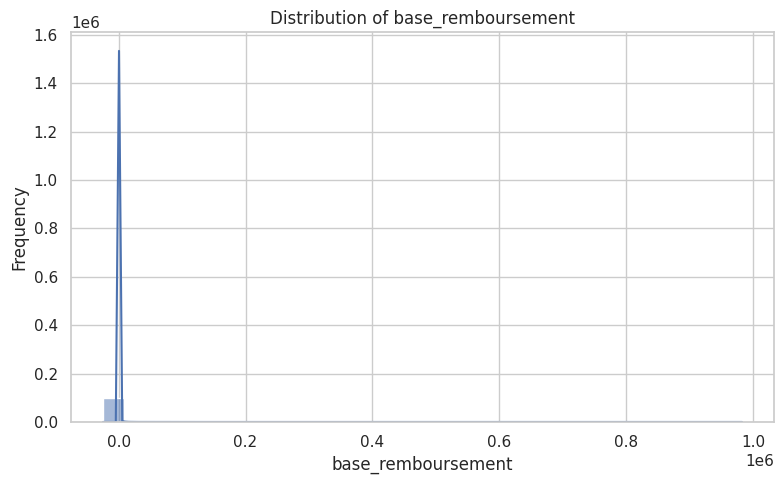

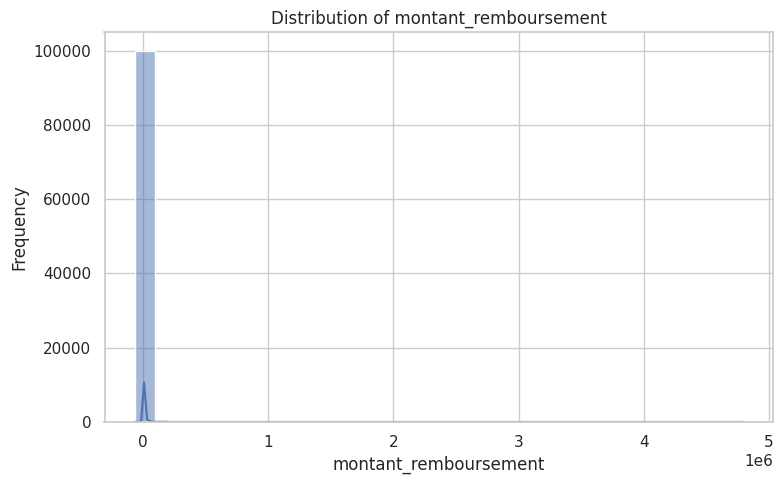

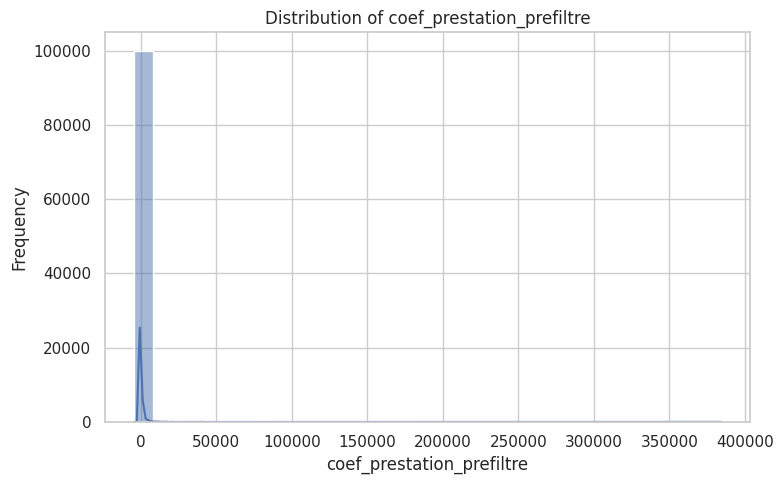

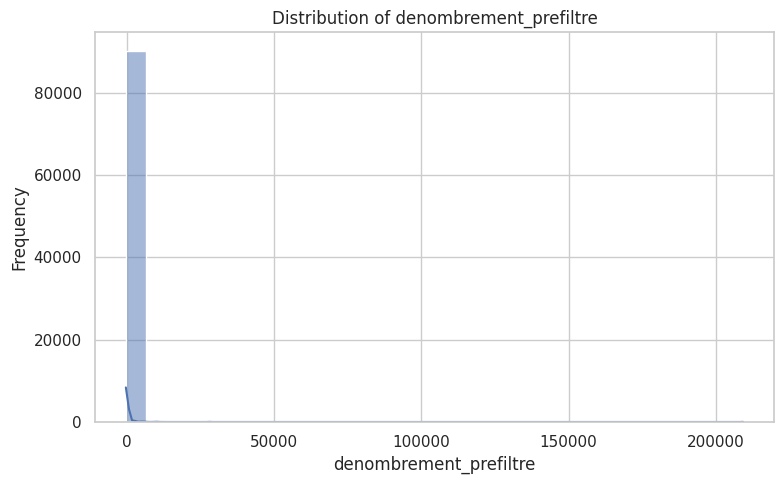

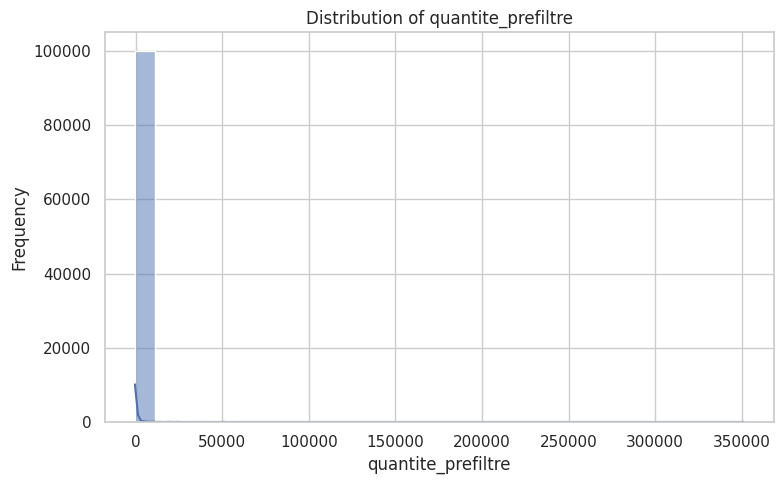

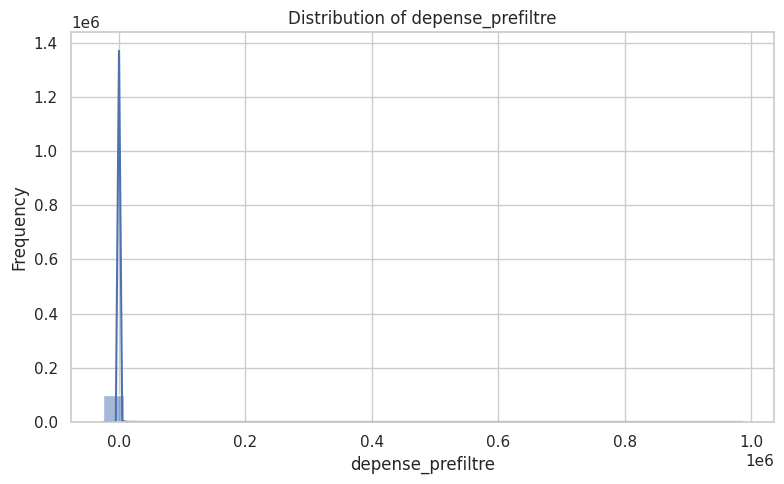

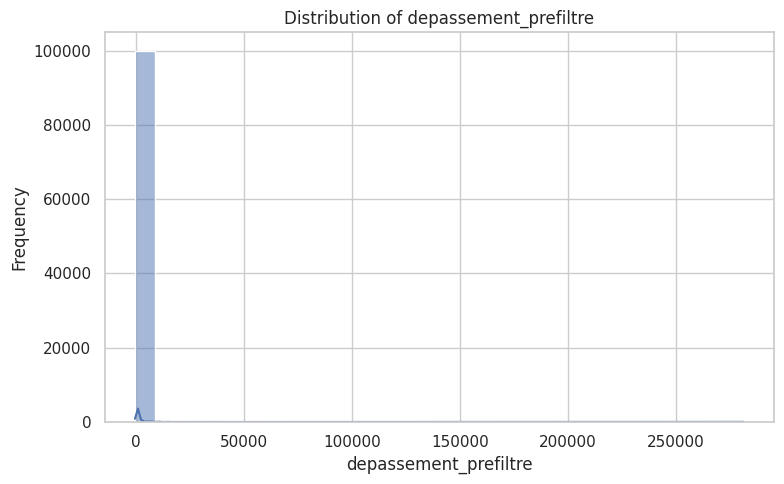

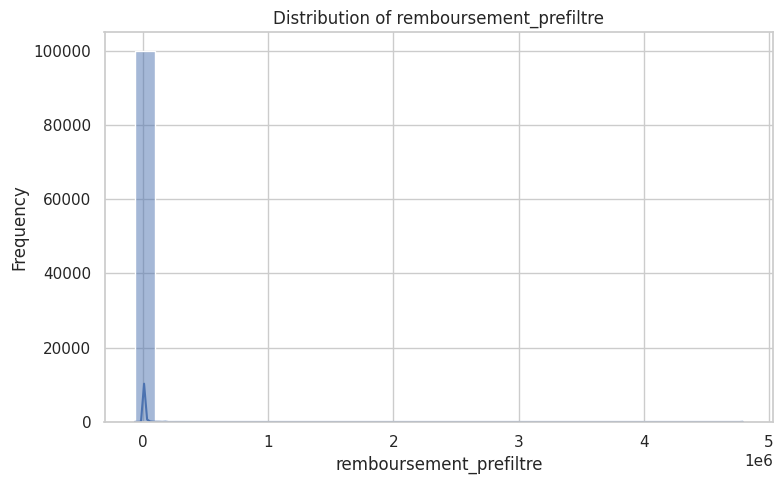

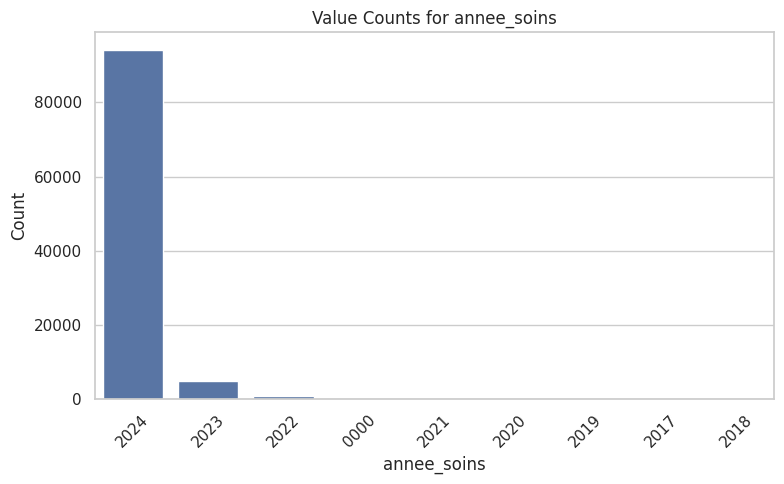

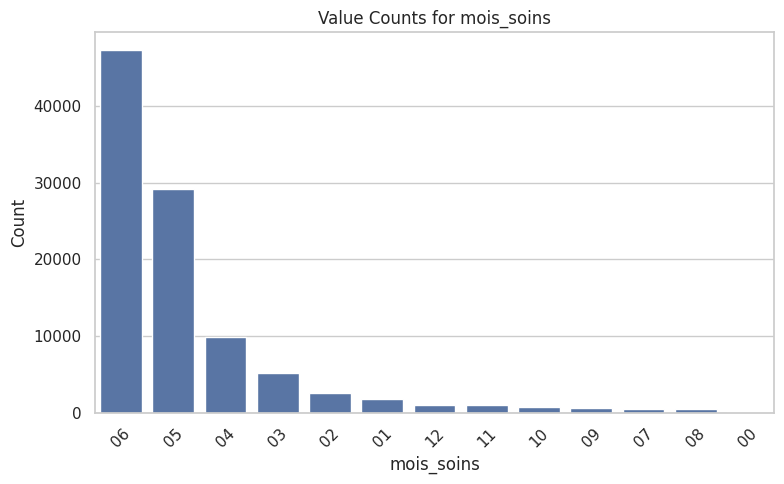

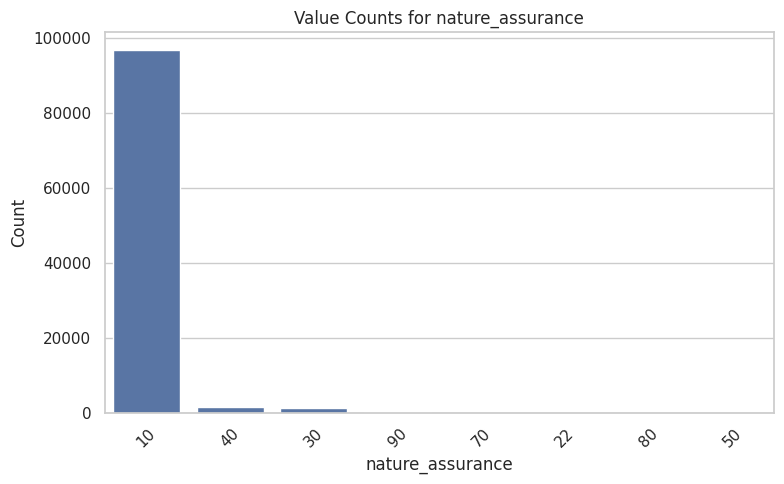

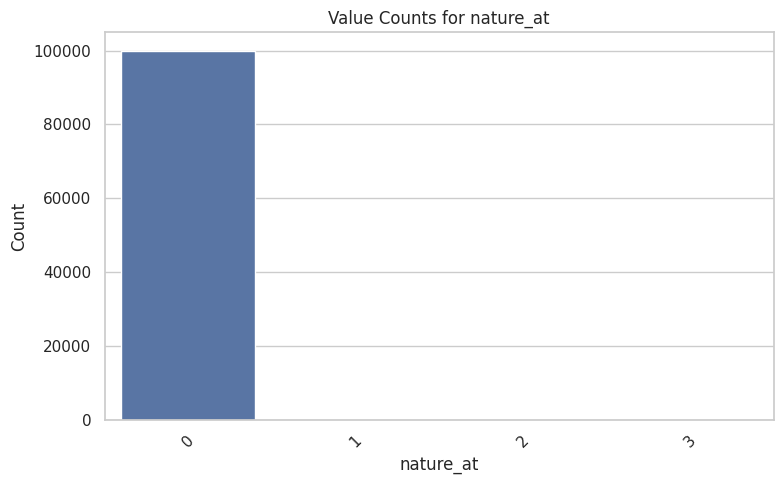

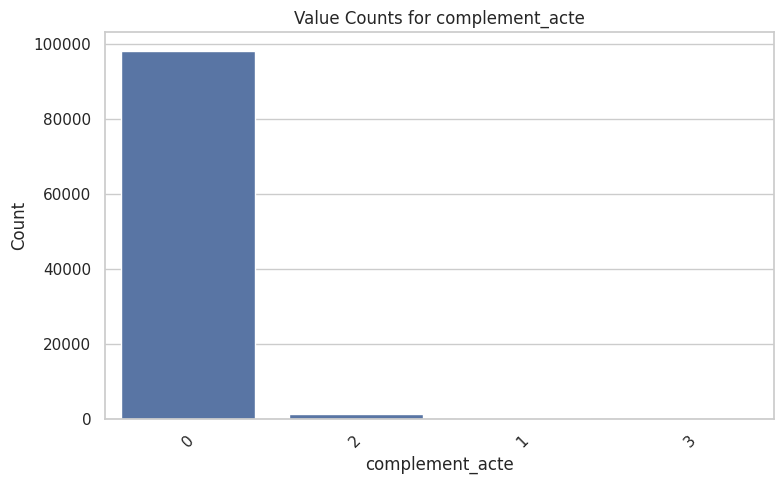

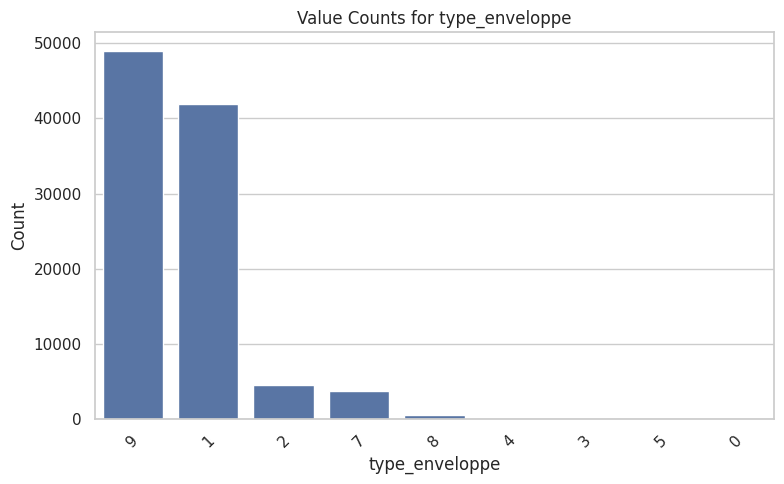

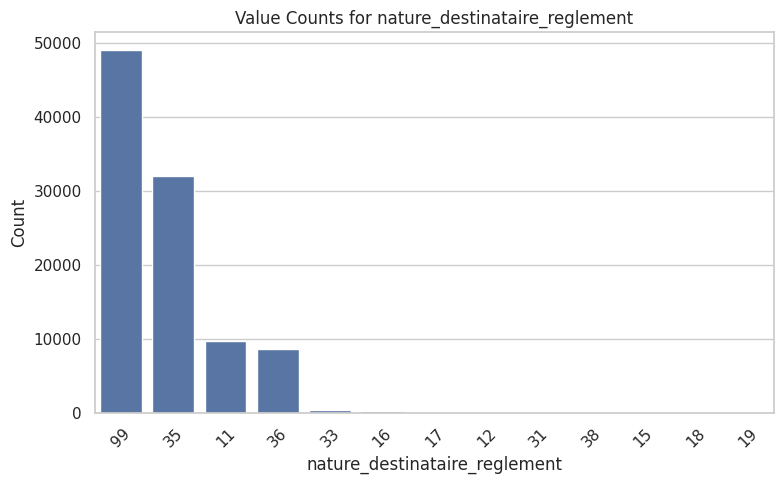

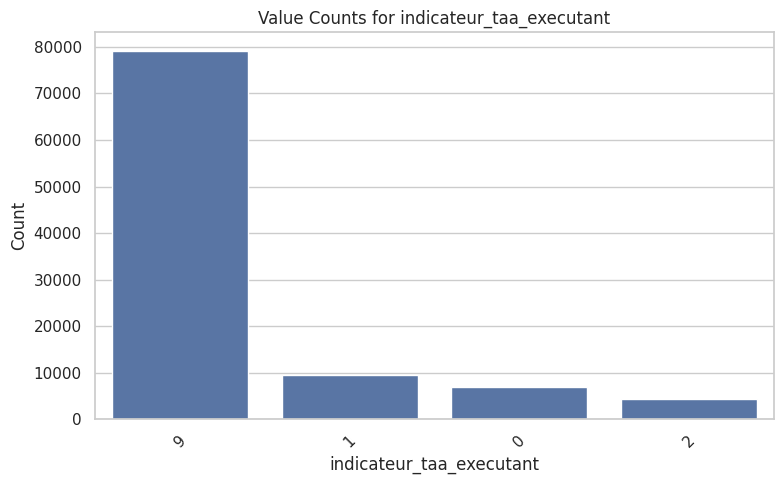

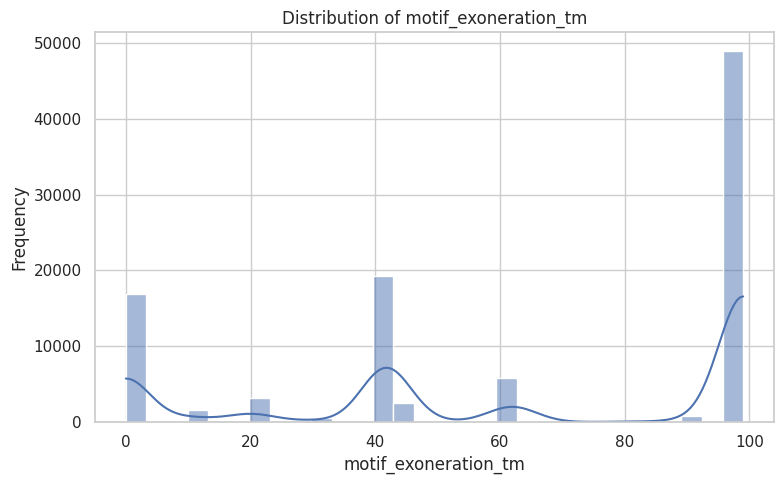

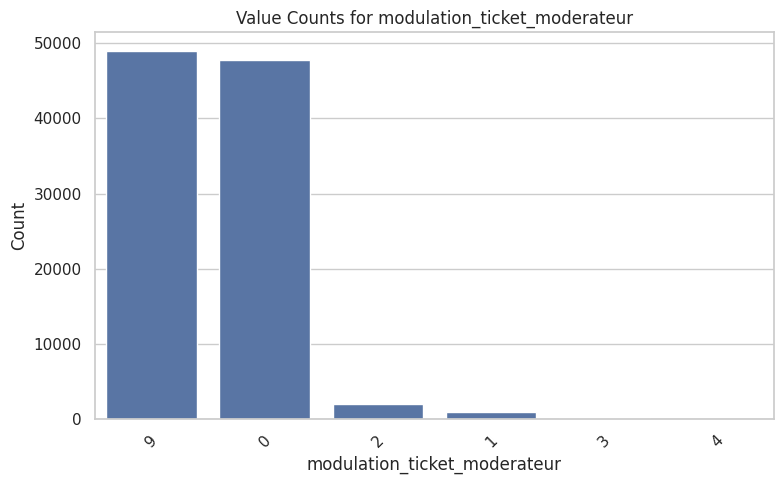

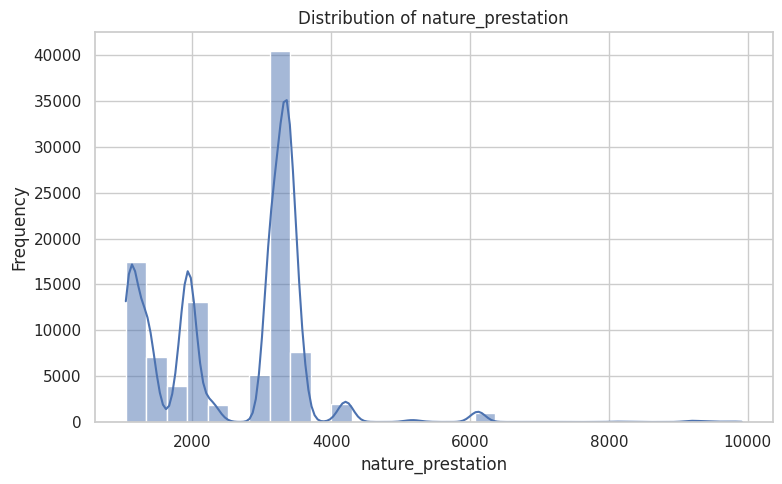

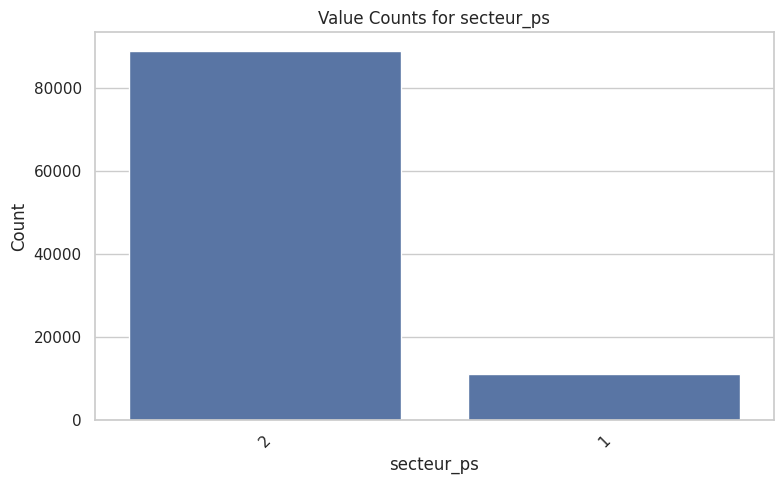

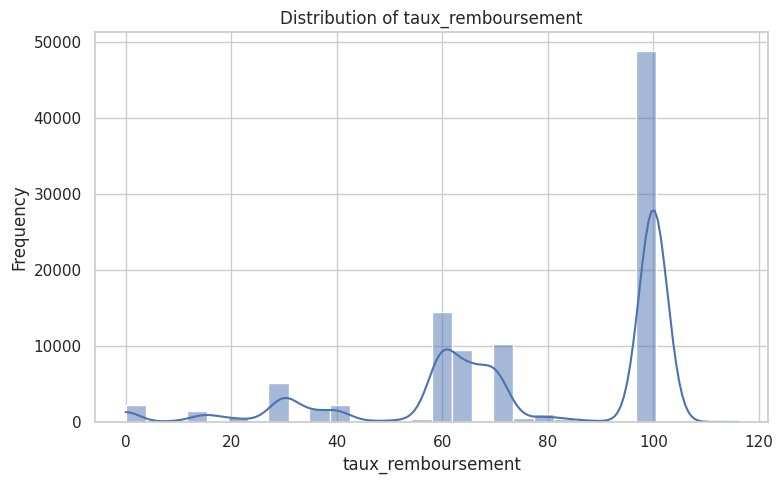

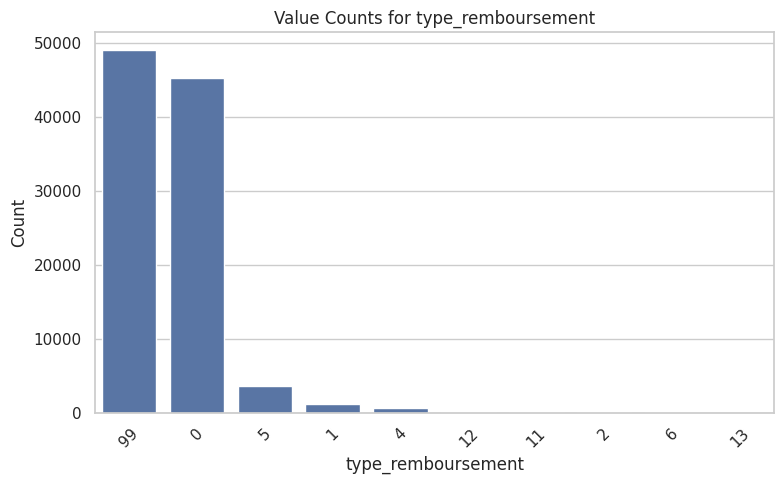

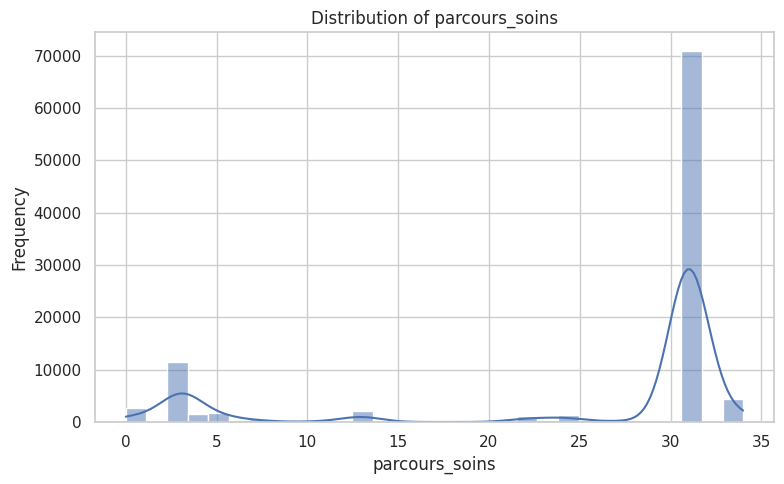

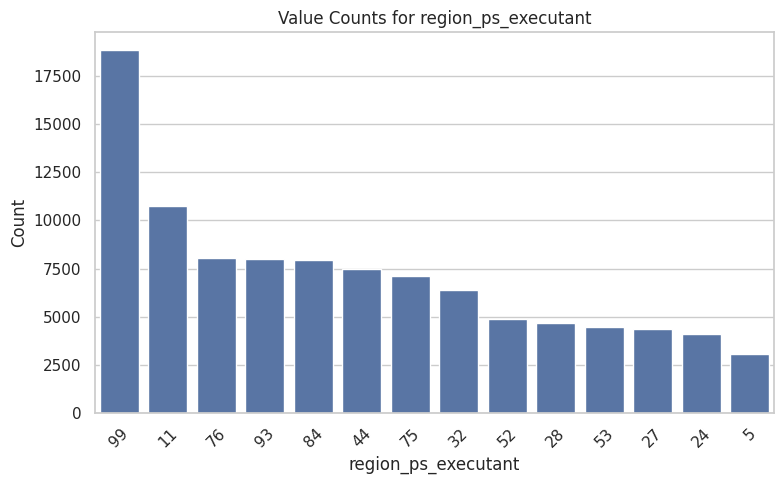

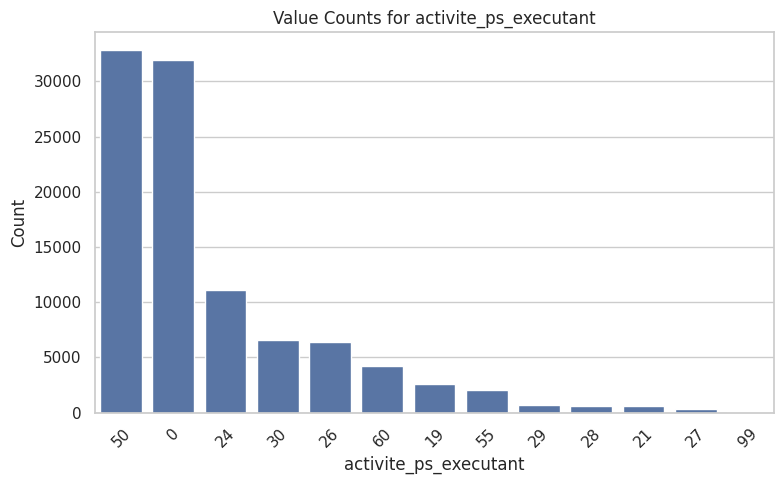

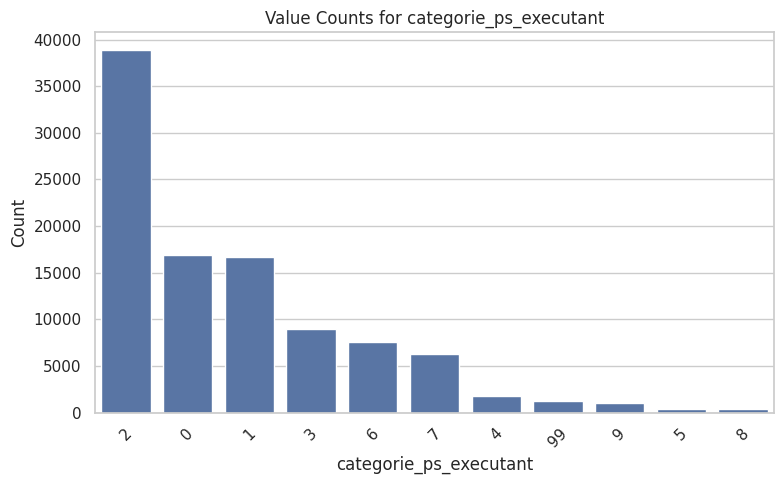

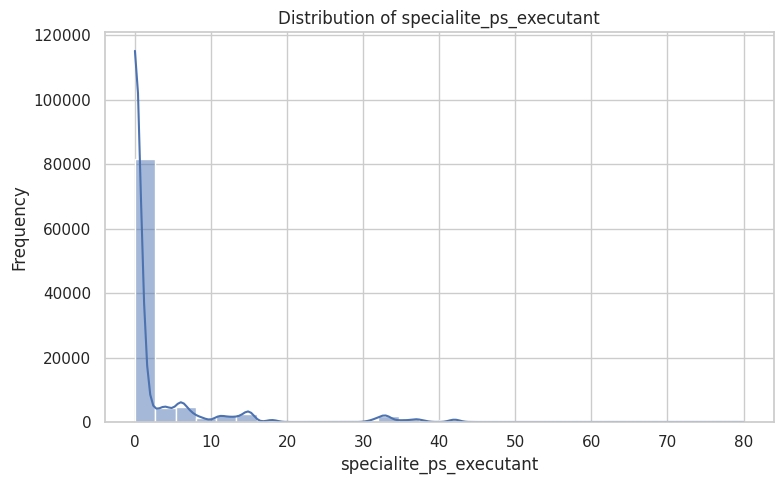

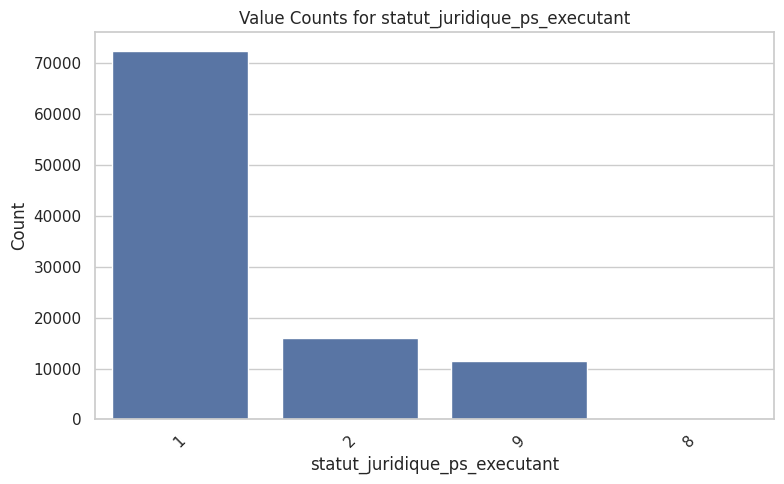

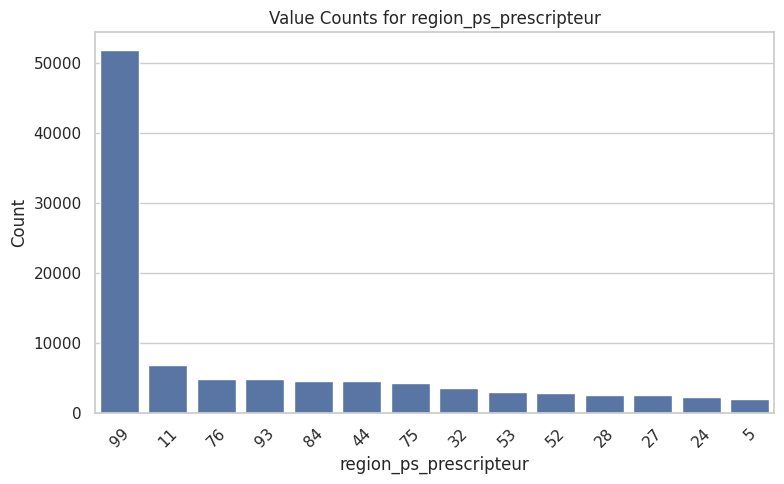

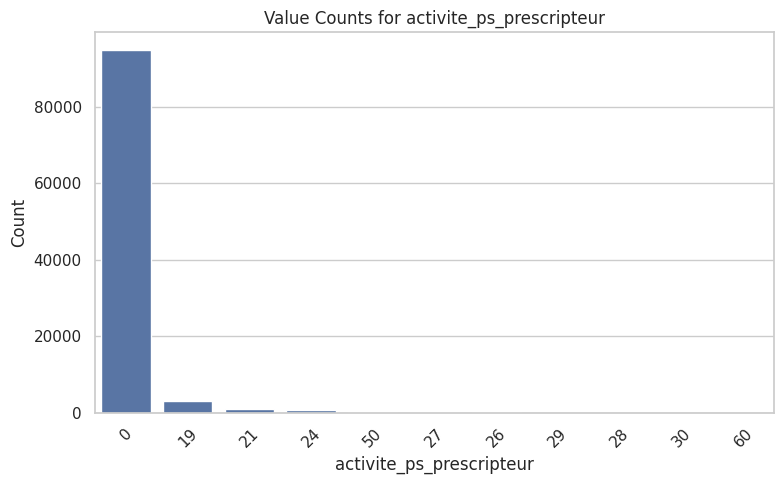

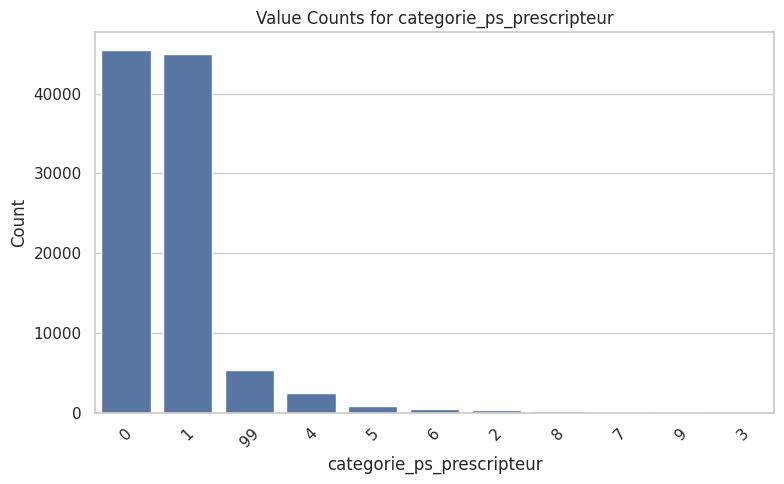

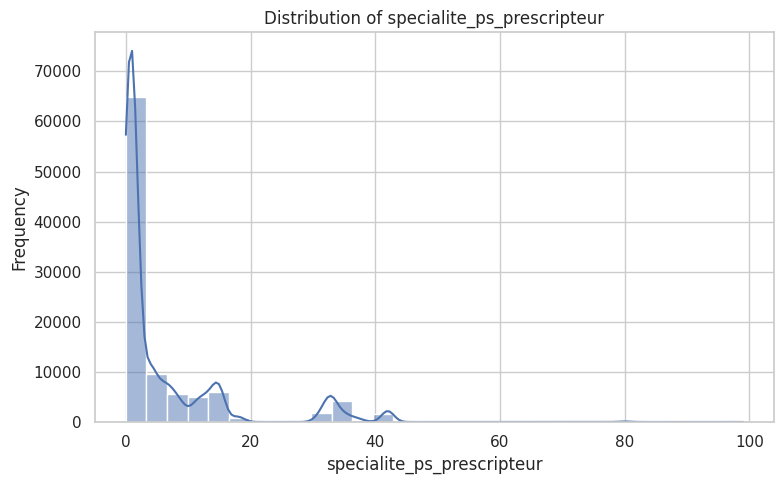

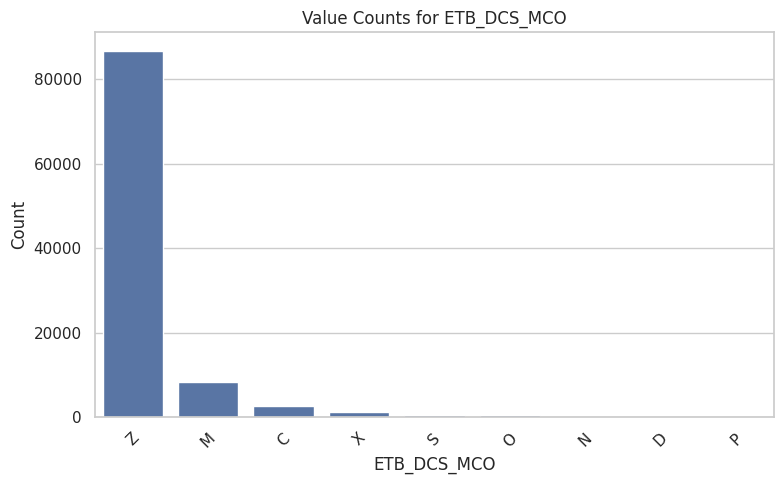

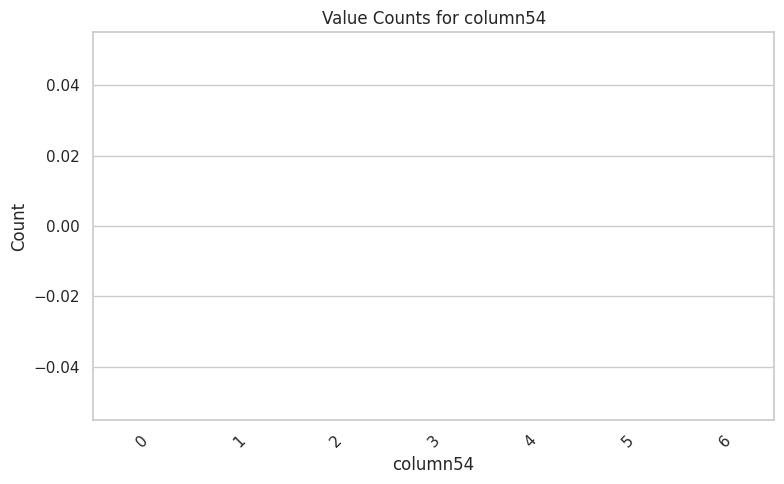

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres de style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Boucle sur les colonnes
for column in df.columns:

    plt.figure()

    # Si la colonne est catégorielle ou peu de valeurs uniques
    if df[column].dtype == 'object' or df[column].nunique() < 20:
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Value Counts for {column}")
        plt.xlabel(column)
        plt.ylabel("Count")

    # Si la colonne est numérique continue
    else:
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

import numpy as np

import numpy as np
from sklearn.impute import SimpleImputer

cols_to_impute = ['region_organisme_liquidateur', 'age_tranche_beneficiaire', 'type_etab_executant', 'type_remboursement']

for col in cols_to_impute:
    if col in df.columns:
        # Remplacer 99 par NaN
        df[col] = df[col].replace(99, np.nan)

        # Appliquer SimpleImputer pour cette colonne uniquement
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

        print(f"Imputed column '{col}' with most frequent value.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")


cols_to_impute2 = ['top_cmu_c','modulation_ticket_moderateur'] # Add other relevant columns

for col in cols_to_impute2:
    if col in df.columns:
        # Replace 99 with NaN
        df[col] = df[col].replace(9, np.nan)

        # Appliquer SimpleImputer pour cette colonne uniquement
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]])

        print(f"Imputed column '{col}' with most frequent value.")
    else:
      print(f"Column '{col}' not found in the DataFrame.")







Imputed column 'region_organisme_liquidateur' with most frequent value.
Imputed column 'age_tranche_beneficiaire' with most frequent value.
Imputed column 'type_etab_executant' with most frequent value.
Imputed column 'type_remboursement' with most frequent value.
Imputed column 'top_cmu_c' with most frequent value.
Imputed column 'modulation_ticket_moderateur' with most frequent value.


In [ ]:
import pandas as pd
print("\nColonnes non numériques et exemples de valeurs uniques :")
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Colonne '{col}' (dtype: {df[col].dtype}) - Exemples de valeurs uniques : {df[col].unique()[:10]}")


Colonnes non numériques et exemples de valeurs uniques :
Colonne 'annee_soins' (dtype: object) - Exemples de valeurs uniques : ['2024' '2023' '2022' '2021' '0000' '2020' '2017' '2019' '2018']
Colonne 'mois_soins' (dtype: object) - Exemples de valeurs uniques : ['06' '05' '01' '04' '11' '03' '02' '08' '10' '12']
Colonne 'ETB_DCS_MCO' (dtype: object) - Exemples de valeurs uniques : ['Z' 'C' 'O' 'M' 'X' 'S' 'N' 'D' 'P']
Colonne 'column54' (dtype: object) - Exemples de valeurs uniques : [None]


In [ ]:
columns_to_exclude = [
    'ETB_DCS_MCO',
    'denombrement',
    'denombrement_prefiltre',
    'column54',
    'remboursement_prefiltre',
    'depassement_prefiltre',
    'depense_prefiltre',
    'coef_prestation_prefiltre',
    'quantite_prefiltre',
    'type_etab_executant',
    'region_implantation_etab_prescripteur',
    'mode_fixation_tarif_etab',
    'mode_traitement_etab',
    'date_traitement_annee_mois',
    'annee_soins',
    'mois_soins',
    'depassement',
    'type_fjh',
    'taux_remboursement',
    'quantite',
    'depense',
    ' type_enveloppe',
    'indicateur_taa_executant',
    'motif_exoneration_tm',
    'coef_prestation',
    'qualite_beneficiaire',
    'region_organisme_liquidateur',
    'activite_ps_prescripteur',
    'categorie_ps_prescripteur',
    'specialite_ps_prescripteur',
    'categorie_etab_prescripteur',
    'secteur_ps',
    'region_ps_prescripteur',
    'nature_destinataire_reglement',
    'parcours_soins',
    'type_enveloppe'
]
target_column = 'montant_remboursement'

# Remove columns_to_exclude from the DataFrame
df = df.drop(columns=columns_to_exclude, errors='ignore')

print("\nDataFrame after excluding columns:")
print(df.head())




DataFrame after excluding columns:
   age_tranche_beneficiaire  region_residence_beneficiaire  top_cmu_c  \
0                        70                             27          9   
1                        60                             75          9   
2                         0                             24          9   
3                        80                             27          9   
4                        70                             76          9   

   sexe_beneficiaire  discipline_prestation  categorie_etab_executant  \
0                  2                      0                      9999   
1                  1                      0                      9999   
2                  2                      0                      9999   
3                  1                      0                      9999   
4                  2                      0                      9999   

   region_implantation_etab_executant  base_remboursement  \
0                        

In [ ]:
df.head()

,age_tranche_beneficiaire,region_residence_beneficiaire,top_cmu_c,sexe_beneficiaire,discipline_prestation,categorie_etab_executant,region_implantation_etab_executant,base_remboursement,montant_remboursement,nature_assurance,nature_at,complement_acte,modulation_ticket_moderateur,nature_prestation,type_remboursement,region_ps_executant,activite_ps_executant,categorie_ps_executant,specialite_ps_executant,statut_juridique_ps_executant
0,70.0,27,9,2,0,9999,99,5.31,0.80,10,0,0,9,3341,99,27,50,2,0,1
1,60.0,75,9,1,0,9999,99,41.75,41.75,10,0,0,9,3211,99,75,30,3,0,1
2,0.0,24,9,2,0,9999,99,0.00,0.87,10,0,0,9,3384,99,24,50,2,0,1
3,80.0,27,9,1,0,9999,99,0.01,0.01,10,0,0,9,3550,99,27,60,2,0,9
4,70.0,76,9,2,0,9999,99,3.92,2.55,10,0,0,9,3313,99,84,50,2,0,9


In [ ]:
X = df.drop(columns = ["montant_remboursement"])
y = df["montant_remboursement"]
print(X)

       age_tranche_beneficiaire  region_residence_beneficiaire  top_cmu_c  \
0                            70                             27          9   
1                            60                             75          9   
2                             0                             24          9   
3                            80                             27          9   
4                            70                             76          9   
...                         ...                            ...        ...   
99995                         0                             99          9   
99996                        70                             76          9   
99997                        80                             32          9   
99998                        40                             24          9   
99999                        20                             11          9   

       sexe_beneficiaire  discipline_prestation  categorie_etab_executant  

In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=42)
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators=50,
    max_iter=10
)
feat_selector.fit(np.array(X), np.array(y))

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	45
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	44
Iteration: 	9 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	44


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	44


BorutaPy(estimator=RandomForestRegressor(max_depth=3, n_estimators=50,
                                         random_state=RandomState(MT19937) at 0x7C22F03B2F40),
         max_iter=10, n_estimators=50,
         random_state=RandomState(MT19937) at 0x7C22F03B2F40, verbose=2)

Le boruta ne fonctionne pas bien

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Étape 1 : Standardiser les données (le PCA est sensible à l’échelle)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Use X_encoded for scaling

# Étape 2 : Appliquer le PCA
pca = PCA(n_components=0.95)  # Garde 95% de la variance
X_pca = pca.fit_transform(X_scaled)

# Use X_encoded.columns for the columns of the pca_components DataFrame
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
for i, row in pca_components.iterrows():
    top_features = row.abs().sort_values(ascending=False).head(3)
    print(f"{i} : {', '.join(top_features.index)}")

# Infos utiles
print(f"Nombre de composantes retenues : {pca.n_components_}")
print(f"Variance expliquée par composante : {np.round(pca.explained_variance_ratio_, 3)}")


PC1 : discipline_prestation, type_remboursement, top_cmu_c
PC2 : categorie_etab_executant, activite_ps_executant, region_implantation_etab_executant
PC3 : categorie_ps_executant, region_residence_beneficiaire, region_ps_executant
PC4 : region_residence_beneficiaire, nature_assurance, region_ps_executant
PC5 : age_tranche_beneficiaire, specialite_ps_executant, region_implantation_etab_executant
PC6 : age_tranche_beneficiaire, statut_juridique_ps_executant, specialite_ps_executant
PC7 : complement_acte, sexe_beneficiaire, statut_juridique_ps_executant
PC8 : base_remboursement, sexe_beneficiaire, age_tranche_beneficiaire
PC9 : sexe_beneficiaire, complement_acte, base_remboursement
PC10 : nature_at, age_tranche_beneficiaire, statut_juridique_ps_executant
PC11 : nature_assurance, age_tranche_beneficiaire, nature_at
PC12 : statut_juridique_ps_executant, categorie_ps_executant, nature_prestation
PC13 : specialite_ps_executant, activite_ps_executant, nature_prestation
Nombre de composantes ret

La proportion de la variance totale expliquée par chaque composante :

PC1 explique 21,5 % de la variance

PC2 : 15,5 %

PC3 : 9,1 %

Donc, les 13 composantes principales retenues expliquent ensemble environ 81,4 % de la variance totale (somme des chiffres).



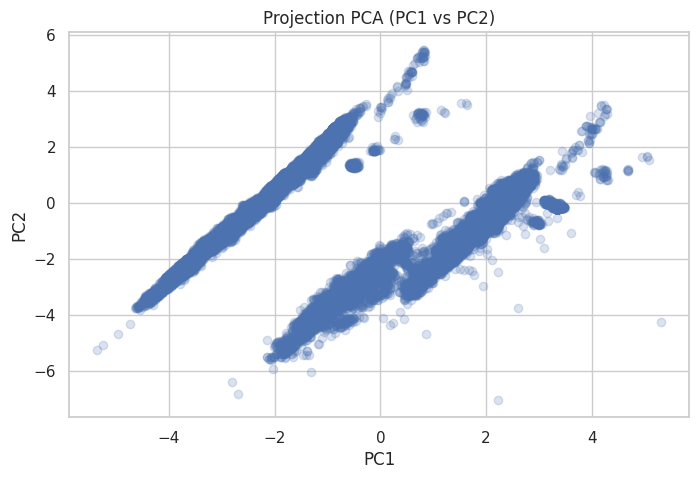

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_pca, y)
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA (PC1 vs PC2)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Étape 2 : PCA (on garde 95% de la variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"{X_pca.shape[1]} composantes conservées pour 95% de variance.")

# Étape 3 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Étape 4 : Modèle
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Étape 5 : Évaluation sur le test
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE test  : {rmse:.2f}")
print(f"R² score test  : {r2:.2f}")


# Prédiction sur train
y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE train : {rmse_train:.2f}")
print(f"R² score train  : {r2_train:.2f}")


13 composantes conservées pour 95% de variance.
RMSE test  : 2103.28
R² score test  : 0.63
RMSE train : 8516.25
R² score train  : 0.79


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Étape 1 : Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assure-toi que X est défini avant ce bloc

# Étape 2 : Split train/test (sans PCA)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Étape 3 : Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Étape 4 : Évaluation sur le test
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE test  : {rmse:.2f}")
print(f"R² score test  : {r2:.2f}")

# Évaluation sur le train
y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)
print(f"RMSE train : {rmse_train:.2f}")
print(f"R² score train  : {r2_train:.2f}")


RMSE test  : 12136.25
R² score test  : -11.40
RMSE train : 8808.32
R² score train  : 0.77


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Étape 2 : PCA (on garde 95% de la variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"{X_pca.shape[1]} composantes conservées pour 95% de variance.")

# Étape 3 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# Étape 4 : Modèle
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Étape 5 : Évaluation sur le test
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE test  : {rmse:.2f}")
print(f"R² score test  : {r2:.2f}")


# Prédiction sur train
y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE train : {rmse_train:.2f}")
print(f"R² score train  : {r2_train:.2f}")


16 composantes conservées pour 95% de variance.
RMSE test  : 4447.98
R² score test  : -0.67
RMSE train : 8052.70
R² score train  : 0.81


In [ ]:
# Création d’un DataFrame avec valeurs réelles et prédites
df_results = pd.DataFrame({
    'Valeur réelle': y_test.reset_index(drop=True),
    'Valeur prédite': y_pred
})

# Enregistrer au format CSV
df_results.to_csv("predictions.csv", index=False)

print("Fichier 'predictions.csv' généré avec succès.")

Fichier 'predictions.csv' généré avec succès.


In [ ]:
first_real_value = y_test.iloc[2]
first_predicted_value = y_pred[2]

# Affichage de la valeur réelle et de la valeur prédite
print(f"Valeur réelle de la première observation : {first_real_value:.2f}")
print(f"Valeur prédite de la première observation : {first_predicted_value:.2f}")


Valeur réelle de la première observation : 60.00
Valeur prédite de la première observation : 52.11


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred = lgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE test  : {rmse:.2f}")
print(f"R² score test  : {r2:.2f}")


# Prédiction sur train
y_pred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE train : {rmse_train:.2f}")
print(f"R² score train  : {r2_train:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] Start training from score 374.339296


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE test  : 3137.95
R² score test  : 0.17
RMSE train : 8516.25
R² score train  : 0.79


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assure-toi que X et y sont définis

# Étape 2 : Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Étape 3 : Créer et entraîner le modèle LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Étape 4 : Prédictions et évaluation sur le test
y_pred = lgb_model.predict(X_test)

# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print(f"RMSE test  : {rmse:.2f}")
print(f"R² score test  : {r2:.2f}")

# Étape 5 : Évaluation sur les données d'entraînement
y_pred_train = lgb_model.predict(X_train)

# Calculate MSE for train, then take the square root for RMSE
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

r2_train = r2_score(y_train, y_pred_train)
print(f"RMSE train : {rmse_train:.2f}")
print(f"R² score train  : {r2_train:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 19
[LightGBM] [Info] Start training from score 374.339296


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RMSE test  : 6135.77
R² score test  : -2.17
RMSE train : 16918.75
R² score train  : 0.15


In [ ]:
first_prediction = lgb_model.predict(X_test[110].reshape(1, -1))[0]

# Obtenez la valeur réelle correspondante
first_real_value = y_test.iloc[110]

# Affichez la valeur réelle et la valeur prédite
print(f"Valeur réelle pour la première observation : {first_real_value:.2f}")
print(f"Prédiction LightGBM pour la première observation : {first_prediction:.2f}")

Valeur réelle pour la première observation : 8.50
Prédiction LightGBM pour la première observation : 12.11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Étape 1 : Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# === Modèle 1 ===
mlp_model_1 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', random_state=42, max_iter=100)
mlp_model_1.fit(X_train, y_train)

# Prédiction test/train
y_pred1_test = mlp_model_1.predict(X_test)

# Évaluation

print(f"Test RMSE test  : {np.sqrt(mean_squared_error(y_test, y_pred1_test)):.2f}")
print(f"Test R² test : {r2_score(y_test, y_pred1_test):.2f}")

y_pred1_train = mlp_model_1.predict(X_train)

print(f"Train RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred1_train)):.2f}")
print(f"Train R² train : {r2_score(y_train, y_pred1_train):.2f}")

# === Modèle 2 ===
mlp_model_2 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', random_state=42, max_iter=1000)
mlp_model_2.fit(X_train, y_train)

y_pred2_test = mlp_model_2.predict(X_test)

print(f"Test RMSE test : {np.sqrt(mean_squared_error(y_test, y_pred2_test)):.2f}")
print(f"Test R² test : {r2_score(y_test, y_pred2_test):.2f}")

y_pred2_train = mlp_model_2.predict(X_train)


print(f"Train RMSE train : {np.sqrt(mean_squared_error(y_train, y_pred2_train)):.2f}")
print(f"Train R² train  : {r2_score(y_train, y_pred2_train):.2f}")

# === Modèle 3 ===
mlp_model_3 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=1000)
mlp_model_3.fit(X_train, y_train)

y_pred3_test = mlp_model_3.predict(X_test)

print(f"Test RMSE test : {np.sqrt(mean_squared_error(y_test, y_pred3_test)):.2f}")
print(f"Test R² test: {r2_score(y_test, y_pred3_test):.2f}")

y_pred3_train = mlp_model_3.predict(X_train)

print(f"Train RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred3_train)):.2f}")
print(f"Train R² train : {r2_score(y_train, y_pred3_train):.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test RMSE test  : 2113.07
Test R² test : 0.62
Train RMSE train: 17467.61
Train R² train : 0.10
Test RMSE test : 3771.93
Test R² test : -0.20
Train RMSE train : 16881.39
Train R² train  : 0.16
Test RMSE test : 2705.96
Test R² test: 0.38
Train RMSE train: 16884.79
Train R² train : 0.16


# Le MLP ayant la meilleur accuracy est le 1er

In [ ]:

first_test_instance_pca = X_test[140].reshape(1, -1)
first_prediction_mlp1 = mlp_model_1.predict(first_test_instance_pca)[0]

# Get the corresponding real value from the test set
first_real_value_mlp1 = y_test.iloc[140]

# Print the real and predicted values
print(f"\nFirst MLP Model (Architecture 1):")
print(f"Valeur réelle pour la première observation : {first_real_value_mlp1:.2f}")
print(f"Prédiction MLP Model 1 pour la première observation : {first_prediction_mlp1:.2f}")


First MLP Model (Architecture 1):
Valeur réelle pour la première observation : 0.33
Prédiction MLP Model 1 pour la première observation : 19.11
